<a href="https://colab.research.google.com/github/usama-masood/NDVIProfilesOfWinterwheat/blob/master/ndviLandSatQuickStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install colour

In [0]:
!apt install libspatialindex-dev
!pip install rasterio
!pip install geopandas
!pip install earthpy

In [0]:
import os
from os.path import isfile, join
from os import listdir
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import pandas as pd
from os.path import isfile, join
from datetime import datetime

In [0]:
import os
from os.path import isfile, join
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
from os.path import isfile, join
from datetime import datetime
from PIL import Image
import numpy as np
from sklearn import preprocessing

In [0]:
basePath = '/content/drive/My Drive/NUST/3rd Semester/Data Mining/Project/Bulk Order 1061747/Landsat 8 OLI_TIRS C1 Level-1/'


In [0]:
# Get list of bands and sort by ascending band number
landsat_bands_data_path = basePath + 'LC08_L1GT_021036_20150115_20170302_01_T2/LC08_L1GT_021036_20150115_20170302_01_T2_B*[1-7]*.TIF'
stack_band_paths = glob(landsat_bands_data_path)
stack_band_paths.sort()



In [24]:
with rio.open(stack_band_paths[0]) as src:
    band0 = src.read()

# View shape of the data
print(band0.shape)

with rio.open(stack_band_paths[3]) as src:
    band3 = src.read()

# View shape of the data
print(band3.shape)



(1, 7841, 7711)
(1, 7841, 7711)


In [25]:
naip_ndvi = es.normalized_diff(band3, band0)

/usr/local/lib/python3.6/dist-packages/earthpy/spatial.py:104: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)
/usr/local/lib/python3.6/dist-packages/earthpy/spatial.py:110: Warning: Divide by zero produced infinity values that will be replaced with nan values
  Warning,


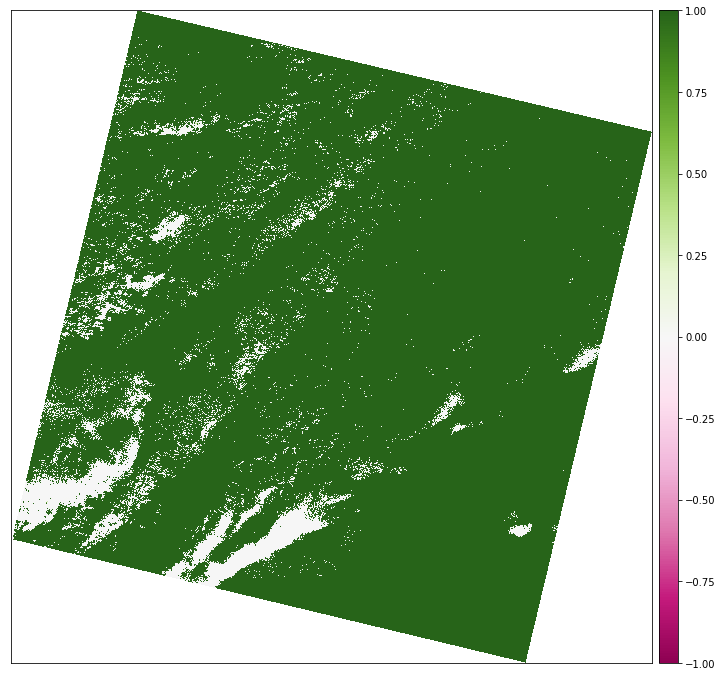

In [26]:
ep.plot_bands(naip_ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()